- 코드 출처 : https://opencv-python.readthedocs.io/en/latest/index.html

In [3]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from google.colab import files

import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

# 이미지 처리 (Image Processing)

- 필요에 따라 적절한 처리 

- `resize()`, `flip()`, `getAffineTransform()`, `warpAffine()` 등 다양한 메서드 존재

## Resize

- `cv2.resize()`
  - 사이즈가 변하면 pixel사이의 값을 결정을 해야함
  
  - 보간법(Interpolation method)
    - 사이즈를 줄일 때 : `cv2.INTER_AREA` 
    
    - 사이즈를 크게 할 때 : `cv2.INTER_CUBIC` , `cv2.INTER_LINEAR`

  - `Parameters`
    - `img` : Image

    - `dsize` : Manual Size. 가로, 세로 형태의 tuple(ex; (100,200))

    - `fx` : 가로 사이즈의 배수. 2배로 크게하려면 2. 반으로 줄이려면 0.5

    - `fy` : 세로 사이즈의 배수

    - `interpolation` : 보간법

![](https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png)

* https://upload.wikimedia.org/wikipedia/ko/2/24/Lenna.png

In [4]:
files.upload()

Saving Lenna.png to Lenna.png


{'Lenna.png': b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x00\xdc\x00\x00\x00\xdc\x08\x06\x00\x00\x00\x1bZ\xcf\x81\x00\x00\x00\x04gAMA\x00\x00\xb1\x8f\x0b\xfca\x05\x00\x00\x00 cHRM\x00\x00z&\x00\x00\x80\x84\x00\x00\xfa\x00\x00\x00\x80\xe8\x00\x00u0\x00\x00\xea`\x00\x00:\x98\x00\x00\x17p\x9c\xbaQ<\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00\x00\x07tIME\x07\xe1\x01\n\x0c\x14#\xc6\xc2\xf4\x10\x00\x00\x80\x00IDATx\xda|\xfdY\xac\xa5Yv\xdf\x89\xfd\xd6\xda{\x7f\xdf9\xe7\x0e1dDF\xceUY\x03\x8bU,\x0e\xe2 Z2E\x8d-\xc8\x96\x07Yv\x1b\x96\x00=\xf8\xc10l\xc0\x80_\xfa\xd9\xedG\xc3\xcfm?\x180\xfc\xe4\xb6\xd1\xdd\xf0\x80\xb6\x81nw\xb3eQ&\xd9\x14IQ\x14\xa9*\xb2\xaa\xb22\xab*\xabr\x88\xf1\x0e\xe7\x9c\xef\xdb{\xaf\xe5\x87\xb5Od\x91\xa2:\x81@fF\xdc\xb8\xf7\x9c\xf3\xeda\xad\xff\xfa\x0f\xf2\xc1\xff\xe6\x7f\xe5\x0e\xa4~\x84<\xe1\xbd\xe3\xbe\xd2\xddqqT\x80zKO\x1bR\xab\x98o\x11i$ix\xd9Q\x8a\xa1*HV\xd2Tp\xeb\xa8\x19\xe6\x82]7\x96\xdb\x85\x9b}\xe1\xd9\x87O\xf9\xe8\xf9\xc2\xf5\x01\x1a\x89\

In [8]:
image = cv2.imread('/content/Lenna.png')
print(image.shape)

(220, 220, 3)


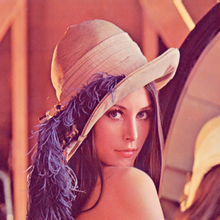

In [10]:
cv2_imshow(image)

In [11]:
height, width = image.shape[:2]

In [14]:
shrink = cv2.resize(image,None, fx=0.5, fy=0.5, interpolation=cv2.INTER_AREA)

expand1 = cv2.resize(image, (width*2, height*2), interpolation=cv2.INTER_CUBIC)

expand2 = cv2.resize(image, None, fx=2,fy=2, interpolation=cv2.INTER_CUBIC)

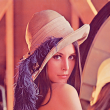

(110, 110, 3)


In [13]:
cv2_imshow(shrink)
print(shrink.shape)

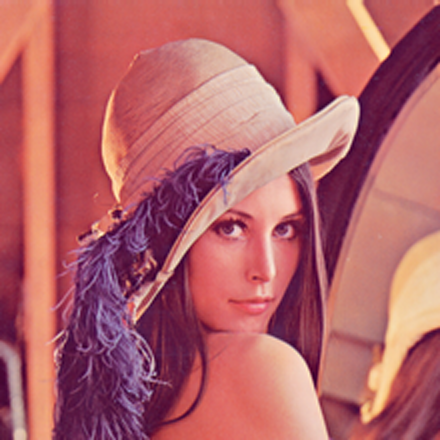

(440, 440, 3)


In [15]:
cv2_imshow(expand1)
print(expand1.shape)

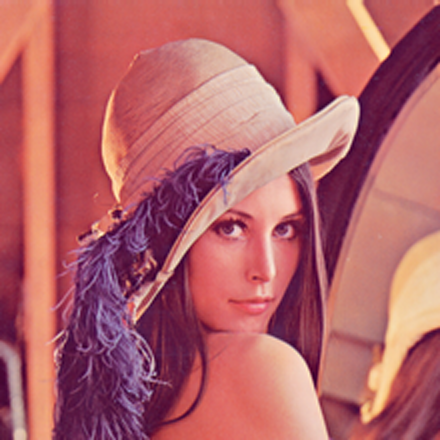

(440, 440, 3)


In [16]:
cv2_imshow(expand2)
print(expand2.shape)

## Translation

- 이미지의 위치를 변경

- `cv2.warpAffine()`

  - `Parameters` 
    - `src` : Image
    
    - `M` : 변환 행렬

    - `dsize` (tuple) : output image size(ex; (width=columns, height=rows)


In [17]:
rows, cols = image.shape[:2]

M = np.float32([[1, 0, 10], [0,1,20]])

dst = cv2.warpAffine(image,M, (cols,rows))

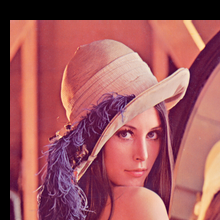

In [18]:
cv2_imshow(dst)

## Rotate

- 물체를 평면상의 한 점을 중심으로 𝜃 만큼 회전하는 변환

- 양의 각도는 시계반대방향으로 회전

- `cv2.getRotationMatrix2D()`
  
  - `Parameters`  	

    - `center` : 이미지의 중심 좌표
    
    - `angle` : 회전 각도

    - `scale` : scale factor

In [19]:
print(image.shape)

(220, 220, 3)


In [20]:
rows, cols = image.shape[:2]

M = cv2.getRotationMatrix2D((cols/2, rows/2), 60, 0.5)

dst = cv2.warpAffine(image, M, (cols, rows))

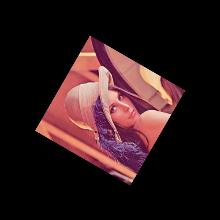

(220, 220, 3)


In [21]:
cv2_imshow(dst)
print(dst.shape)

## Flip

- 대칭 변환
  - 좌우 대칭 (좌우 반전)

  - 상하 대칭 (상하 반전)

- 입력 영상과 출력 영상의 픽셀이 1:1 매칭이므로 보간법이 필요 없음

- `cv2.flip()`

  - Parameters

    - `src` : 입력 영상

    - `flipCode` : 대칭 방법을 결정하는 flag 인자

      - 양수이면 좌우 대칭

      - 0이면 상하 대칭

      - 음수이면 상하, 좌우 대칭을 모두 실행

In [22]:
img = cv2.imread('/content/Lenna.png')
print(img.shape)

(220, 220, 3)


In [23]:
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

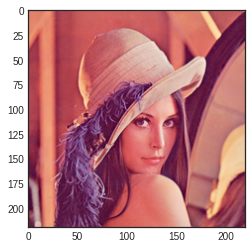

In [24]:
plt.imshow(img)
plt.show()

In [25]:
result1 = cv2.flip(img,1)

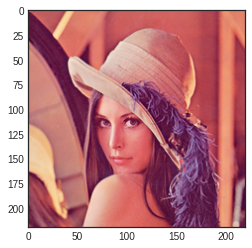

In [26]:
plt.imshow(result1)
plt.show()

In [27]:
result2 = cv2.flip(img, 0)

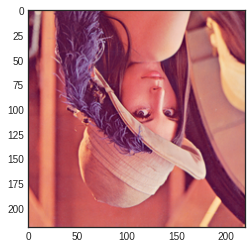

In [28]:
plt.imshow(result2)
plt.show()

In [29]:
result3 = cv2.flip(img, -1)

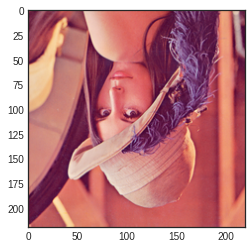

In [30]:
plt.imshow(result3)
plt.show()

## Affine Transformation

- 선의 평행선은 유지되면서 이미지를 변환하는 작업

- 이동, 확대, Scale, 반전까지 포함된 변환

- `cv2.getAffineTransform()`

  - Affine 변환을 위해서는 3개의 Match가 되는 점이 있으면 변환행렬을 구할 수 있음

In [38]:
rows, cols, ch = image.shape

pts1 = np.float32([[100, 50],[200,50],[100,100]])
pts2 = np.float32([[100, 150],[200,100],[100,200]])

cv2.circle(image,(200,100),10,(255,0,0),-1)
cv2.circle(image, (400,100), 10, (0,255,0),-1)
cv2.circle(image, (200,200), 10, (0,0,255),-1)

M = cv2.getAffineTransform(pts1,pts2)

dst = cv2.warpAffine(image,M,(cols, rows))

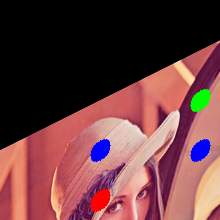

(220, 220, 3)


In [39]:
cv2_imshow(dst)
print(dst.shape)

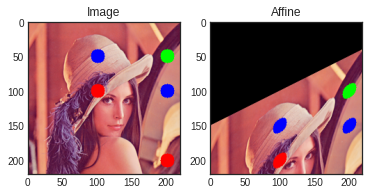

In [42]:
plt.subplot(121),plt.imshow(image[:,:,::-1]),plt.title('Image')
plt.subplot(122),plt.imshow(dst[:,:,::-1]),plt.title('Affine')
plt.show()

## Perspective Transformation

- Perspective(원근법) 변환

- 직선의 성질만 유지, 선의 평행성은 유지가 되지 않는 변환

- 기차길은 서로 평행하지만 원근변환을 거치면 평행성은 유지 되지 못하고 하나의 점에서 만나는 것 처럼 보임 (반대의 변환도 가능)

- 4개의 Point의 Input값과 이동할 output Point 가 필요

- `cv2.getPerspectiveTransform()`가 필요하며, `cv2.warpPerspective()` 함수에 변환행렬값을 적용하여 최종 결과 이미지를 얻을 수 있음


- train.jpg

  <img src="https://cdn.pixabay.com/photo/2015/04/04/06/54/train-706219_960_720.jpg" width="200">

  <sub>[이미지 출처] https://pixabay.com/ko/photos/%EA%B8%B0%EC%B0%A8-%EA%B8%B0%EC%B0%A8%EA%B8%B8-%EA%B0%88%EB%A6%BC%EA%B8%B8-706219/</sub>

In [68]:
files.upload()

Saving train-706219_640.jpg to train-706219_640.jpg


{'train-706219_640.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x00\x00\x01\x00\x01\x00\x00\xff\xdb\x00C\x00\x05\x03\x04\x04\x04\x03\x05\x04\x04\x04\x05\x05\x05\x06\x07\x0c\x08\x07\x07\x07\x07\x0f\x0b\x0b\t\x0c\x11\x0f\x12\x12\x11\x0f\x11\x11\x13\x16\x1c\x17\x13\x14\x1a\x15\x11\x11\x18!\x18\x1a\x1d\x1d\x1f\x1f\x1f\x13\x17"$"\x1e$\x1c\x1e\x1f\x1e\xff\xdb\x00C\x01\x05\x05\x05\x07\x06\x07\x0e\x08\x08\x0e\x1e\x14\x11\x14\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\x1e\xff\xc2\x00\x11\x08\x02\x80\x01\xac\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1c\x00\x00\x01\x05\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x04\x00\x01\x02\x03\x05\x06\x07\x08\xff\xc4\x00\x19\x01\x00\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\x05\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf54\x9b\\\xd2L\x0

In [70]:
train = cv2.imread('/content/train-706219_640.jpg')

In [71]:
print(train.shape)

(640, 428, 3)


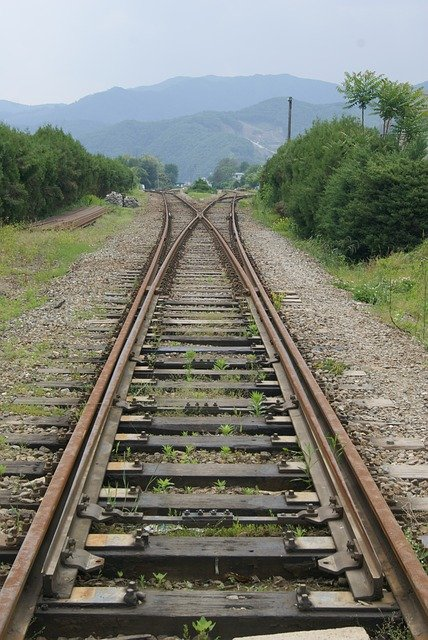

In [72]:
cv2_imshow(train)

- 좌표점은 `왼쪽 위 -> 오른쪽 위 -> 오른쪽 아래 -> 왼쪽 아래`

In [73]:
top_left = (130,300)
top_right = (270,300)
bottom_right = (400,550)
bottom_left = (30,550)

pts1 = np.float32([top_left, top_right,
                   bottom_right, bottom_left])

w1 = abs(bottom_right[0] - bottom_left[0])
w2 = abs(top_right[0] - top_left[0])

h1 = abs(top_right[1] - bottom_right[1])
h2 = abs(top_left[1] - bottom_left[1])

max_width = max([w1,w2])
max_height = max([h1,h2])

pts2 = np.float32([[0,0],
                  [max_width-1,0],
                  [max_width-1,max_height-1],
                  [0,max_height-1]])

In [74]:
cv2.circle(train,top_left, 10, (255,0,0),-1)
cv2.circle(train,top_right, 10, (0,255,0),-1)
cv2.circle(train,bottom_left, 10, (0,0,255),-1)
cv2.circle(train,bottom_right, 10, (0,0,0),-1)

array([[[244, 232, 226],
        [244, 232, 226],
        [244, 232, 226],
        ...,
        [228, 211, 198],
        [228, 211, 198],
        [228, 211, 198]],

       [[244, 232, 226],
        [244, 232, 226],
        [244, 232, 226],
        ...,
        [228, 211, 198],
        [228, 211, 198],
        [228, 211, 198]],

       [[244, 232, 226],
        [244, 232, 226],
        [244, 232, 226],
        ...,
        [228, 210, 199],
        [228, 210, 199],
        [228, 210, 199]],

       ...,

       [[ 47,  67,  92],
        [ 46,  67,  89],
        [ 41,  64,  86],
        ...,
        [ 66,  94, 118],
        [ 62,  89, 115],
        [ 59,  87, 111]],

       [[ 44,  64,  89],
        [ 51,  72,  94],
        [ 38,  61,  83],
        ...,
        [ 64,  94, 119],
        [ 60,  89, 116],
        [ 58,  88, 113]],

       [[ 40,  60,  85],
        [ 53,  74,  96],
        [ 36,  59,  81],
        ...,
        [ 65,  95, 122],
        [ 62,  91, 118],
        [ 60,  89, 116]]

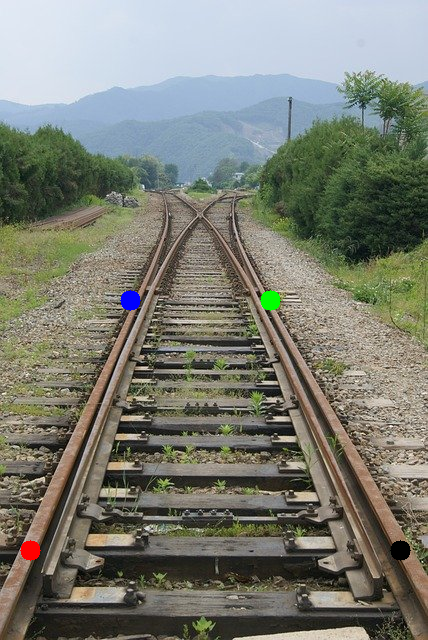

In [75]:
cv2_imshow(train)

In [77]:
M = cv2.getPerspectiveTransform(pts1,pts2)

dst = cv2.warpPerspective(train, M, (max_width, max_height))

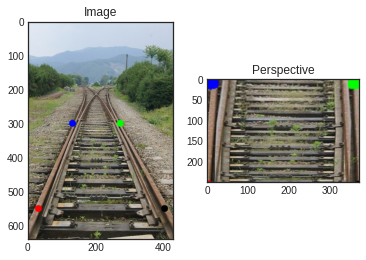

In [78]:
plt.subplot(121), plt.imshow(train[:,:,::-1]), plt.title('Image')
plt.subplot(122), plt.imshow(dst[:,:,::-1]), plt.title('Perspective')
plt.show()